In [6]:
#IMporting libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
#Using pandas library function to directly read csv file and here the file is in the same directory
train_data = pd.read_csv("local_train.csv")
train_data

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000
...,...,...,...,...,...,...,...,...,...,...,...
1163,6,1400,2,440,672,672,1,6,1978,1978,149500
1164,7,1472,2,402,384,802,2,7,1991,1992,160000
1165,5,789,1,250,789,789,1,5,1948,1950,115000
1166,6,1661,1,377,992,1661,1,8,1955,1996,165500


In [19]:
#Renaming 1stFlrSF as it's not accepting a string with numerical vals
train_data.columns = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "FirstFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd", "SalePrice"]
train_data

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,FirstFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000
...,...,...,...,...,...,...,...,...,...,...,...
1163,6,1400,2,440,672,672,1,6,1978,1978,149500
1164,7,1472,2,402,384,802,2,7,1991,1992,160000
1165,5,789,1,250,789,789,1,5,1948,1950,115000
1166,6,1661,1,377,992,1661,1,8,1955,1996,165500


In [25]:
y_train = train_data.iloc[:, 10:11]
X_train = train_data.iloc[:, 0:10]

In [26]:
#Using normalization to scale our features
X_train_normal = (X_train-X_train.mean())/X_train.std()
#Checking the normalization result in the head of file(The starting of the file consisting only a few data points)
X_train_normal.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,FirstFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,0.656409,0.569608,-1.044836,-1.111755,-0.069209,-0.084179,0.791341,0.928126,-1.515070,-1.676737
1,0.656409,0.237557,-1.044836,-1.111755,-0.312009,-0.638238,0.791341,0.297130,-0.988295,-1.676737
2,-0.810932,-0.392195,0.303637,0.036325,-0.294024,-0.617622,-1.049867,-0.333866,-1.383377,0.786878
3,2.857421,1.680261,1.652111,0.920911,4.579950,3.186057,0.791341,2.190119,1.217576,1.125021
4,0.656409,-0.512420,0.303637,-0.349505,0.405149,0.225063,0.791341,-0.333866,0.789571,0.545347


In [54]:
#Converting to numpy for matrix multiplicqation and other mathematical ops
X_train = X_train_normal.to_numpy()
X_train

array([[ 0.65640899,  0.56960799, -1.0448359 , ...,  0.92812629,
        -1.51507048, -1.67673683],
       [ 0.65640899,  0.23755709, -1.0448359 , ...,  0.29713007,
        -0.98829534, -1.67673683],
       [-0.81093206, -0.3921946 ,  0.30363739, ..., -0.33386615,
        -1.3833767 ,  0.78687768],
       ...,
       [-0.81093206, -1.39788896, -1.0448359 , ..., -0.96486237,
        -0.75783121, -1.67673683],
       [-0.07726154,  0.26618217, -1.0448359 , ...,  0.92812629,
        -0.52736709,  0.54534685],
       [ 0.65640899, -0.15174395,  0.30363739, ..., -0.96486237,
         0.62495354,  0.25550984]])

In [55]:
m,n = X_train.shape
n

10

In [56]:
b_init = 0
w_init = np.ones(n)
w_init

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [57]:
def predict(x, w, b): 
    #Using parallel computig for more efficiency
    p = np.dot(x, w) + b     
    return p

In [128]:
def compute_cost(X, y, w, b, lamd = 0.0001): 
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           
        cost = cost + (f_wb_i - y[i])**2/(2*m)  + lamd*np.sum(w**2)/(2)                  
    return cost

In [59]:
def compute_gradient(X, y, w, b): 
    m,n = X.shape        
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [60]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print("Iteration: ", i, "Cost: ", J_history[-1])
        
    return w, b, J_history #return final w,b and J history for graphing

In [130]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 6e-3
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("final w:", w_final, "final_b",b_final)
m,_ = X_train.shape

Iteration:  0 Cost:  [1.92694354e+10]
Iteration:  100 Cost:  [5.76231226e+09]
Iteration:  200 Cost:  [2.32975545e+09]
Iteration:  300 Cost:  [1.29378787e+09]
Iteration:  400 Cost:  [9.79865981e+08]
Iteration:  500 Cost:  [8.84379902e+08]
Iteration:  600 Cost:  [8.55412282e+08]
Iteration:  700 Cost:  [8.46928839e+08]
Iteration:  800 Cost:  [8.44856373e+08]
Iteration:  900 Cost:  [8.44823204e+08]
final w: [26099.58896274 20570.29122824  7113.22097239  5500.94533746
  8337.27475883  6408.19800751 -1557.89722427  4294.57278673
  6789.04102512  6606.25312313] final_b [180782.42855956]


In [131]:
print("Prediction: ", np.dot(X_train[3], w_final) + b_final, "Target: ", y_train[3])

Prediction:  [389213.42288638] Target:  [555000]


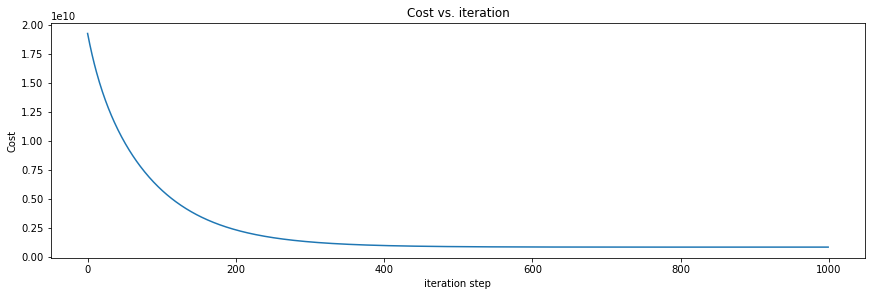

In [132]:
# plot cost versus iteration  
fig, ax1= plt.subplots(constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax1.set_title("Cost vs. iteration")
ax1.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
plt.show()

In [133]:
test_data = pd.read_csv("local_test.csv")
y_test = train_data.iloc[:, 10:11]
X_test = train_data.iloc[:, 0:10]
X_test_normal = (X_test-X_test.mean())/X_test.std()
X_test = X_test_normal.to_numpy()
np.dot(X_test[2], w_final) + b_final
y_test = y_test['SalePrice'].tolist()
error =0
for i in range(X_test.shape[0]):
    error += abs((float(np.dot(X_train[2], w_final) + b_final)-y_test[i])/y_test[i])
error = error/i
print('Percentage accuracy: ', (1-error)*100, "%")

Percentage accuracy:  70.83409107797003 %
